In [3]:
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#data source: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data
data=pd.read_csv("/content/sales_data_sample.csv", encoding='latin1')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
data.columns=[col.lower() for col in list(data.columns)]
data.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### Plotting Sales

In [6]:
data.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

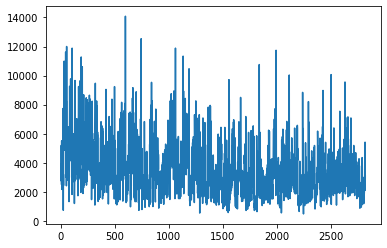

In [7]:
#using plt
plt.plot(data.sales)

In [8]:
#using plotly
pyo.iplot([{
    'x':data.index,
    'y': data.sales
}])

## Ploting sales and profit

In [63]:
import random
temp_prof= data[['sales']]

profit_percent=[]
for _ in range(temp_prof.shape[0]):
  profit_percent.append(random.randint(-15, 25))
temp_prof['profit']= (temp_prof['sales']*profit_percent)*(1/100)

<ipython-input-63-acbcac4e7989>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
#plotly
pyo.iplot([{
    'x': temp.index,
    'y': temp[cols], 
    'name': cols
}for cols in temp.columns])

## Scatter plot

In [11]:
import plotly.graph_objects as go

chart= go.Scatter(
         x= temp.sales,
         y= temp.profit,
         mode= 'markers',
     )
#sales vs profit
pyo.iplot([chart])

## Layout of the charts

In [12]:
layout= go.Layout(
    title= "Sales vs profit",
    xaxis= dict(title="Sales"),
    yaxis= dict(title= "profit")
)

In [13]:
figure= go.Figure(data= chart, layout=layout)

In [14]:
pyo.iplot(figure)

## Bar chart

In [15]:
temp=data.groupby('city')['sales'].mean().reset_index().sort_values(by=['sales'], ascending=False)[:10]

In [16]:
chart= go.Bar(
    x= temp.city,
    y=temp.sales,
    marker=dict(
        color='rgb(120,0,0)'
    )
)

layout= go.Layout(title="Distribution of sales across cities")

In [17]:
figure= go.Figure(data=chart, layout=layout)
pyo.iplot(figure)

## Line Chart

In [18]:
temp=data[data.year_id==2003]
temp=temp[['month_id', 'sales']]
temp= temp.groupby('month_id')['sales'].mean().reset_index()
temp

,month_id,sales
0,1,3327.015385
1,2,3435.029024
2,3,3490.098000
3,4,3476.026724
4,5,3321.950172
5,6,3653.968696
6,7,3754.637600
7,8,3410.505172
8,9,3473.333684
9,10,3596.778291


In [19]:
chart= go.Scatter(
    x= temp.month_id,
    y=temp['sales'],
    mode='lines'
)

In [20]:
layout= go.Layout(title=' Monthly Avg sales in 2003')
figure=go.Figure(data=chart, layout= layout)
pyo.iplot(figure)

## Multiple Line Chart

In [21]:
temp=data[data.year_id==2003]
temp=temp[['month_id', 'sales']]
temp= temp.groupby('month_id')['sales'].mean().reset_index()
temp

,month_id,sales
0,1,3327.015385
1,2,3435.029024
2,3,3490.098000
3,4,3476.026724
4,5,3321.950172
5,6,3653.968696
6,7,3754.637600
7,8,3410.505172
8,9,3473.333684
9,10,3596.778291


In [22]:
grp= data.groupby(['year_id', 'month_id'])['sales'].mean().reset_index()
data03= grp[grp.year_id==2003]
data04= grp[grp.year_id==2004]
data05= grp[grp.year_id==2005]

In [23]:
data05

,year_id,month_id,sales
24,2005,1,3429.731515
25,2005,2,3692.641031
26,2005,3,3530.780755
27,2005,4,4672.023036
28,2005,5,3815.508833


In [24]:
trace0= go.Scatter(
    x=data03.month_id,
    y=data03.sales,
    mode='lines+markers',
    name="2003"
)

trace1= go.Scatter(
    x=data04.month_id,
    y=data04.sales,
    mode='lines+markers',
    name="2004"
)

trace2= go.Scatter(
    x=data05.month_id,
    y=data05.sales,
    mode='lines+markers',
    name="2005"
)

In [25]:
chart=[trace0,trace1,trace2]
layout=go.Layout(
    title= "Monthly avg sale year on year",
    xaxis= dict(title="Months"),
    yaxis= dict(title="Avg Sales")
)

In [26]:
figure= go.Figure(data=chart, layout=layout)
pyo.iplot(figure)

We can automate creating n number of traces

## Group Bar Chart

In [27]:
data.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [28]:
temp= data[['year_id', 'month_id', "sales"]]
temp=temp[(temp['month_id'] <6) & (temp['month_id']>=1)]
grp_year= temp.groupby('year_id')['sales'].sum().reset_index()
grp_year.head()

,year_id,sales
0,2003,839377.35
1,2004,1313317.19
2,2005,1791486.71


In [29]:
chart= go.Bar(
    x=grp_year.year_id,
    y= grp_year.sales,
)

In [30]:
layout=go.Layout(title="Total sales of first 5 months per year")

In [31]:
figure=go.Figure(data=chart, layout=layout)
pyo.iplot(figure)

Now creating group bar chart

In [32]:
temp= data[['year_id', 'month_id', "sales"]]
temp=temp[(temp['month_id'] <6) & (temp['month_id']>=1)]

grp = temp.groupby(['year_id', 'month_id'])['sales'].sum().reset_index()

grp03= grp[grp.year_id==2003]
grp04= grp[grp.year_id==2004]
grp05= grp[grp.year_id==2005]
grp05

,year_id,month_id,sales
10,2005,1,339543.42
11,2005,2,358186.18
12,2005,3,374262.76
13,2005,4,261633.29
14,2005,5,457861.06


In [33]:
trace0= go.Bar(
    x=grp03.month_id,
    y=grp03.sales,
    name='2003'
)

trace1= go.Bar(
    x=grp04.month_id,
    y=grp04.sales,
    name="2004"
)

trace2= go.Bar(
    x=grp05.month_id,
    y=grp05.sales,
    name="2005"
)

In [34]:
chart=[trace0, trace1, trace2]
layout=go.Layout(
    title="monthly total sales comparision"
)
figure=go.Figure(data=chart, layout=layout)

pyo.iplot(figure)

We see that sales increases per year for every month

## Stack Bar Chart

In [35]:
layout=go.Layout(
    title="monthly total sales comparision",
    barmode='stack'
)
figure=go.Figure(data=chart, layout=layout)

pyo.iplot(figure)


## Combining Bar Chart and Line Chart

In [36]:
trace0= go.Bar(
    x=grp03.month_id,
    y=grp03.sales,
    name='2003'
)

trace1= go.Scatter(
    x=grp04.month_id,
    y=grp04.sales,
    mode='lines+markers',
    name="2004"
)

trace2= go.Bar(
    x=grp05.month_id,
    y=grp05.sales,
    name="2005"
)

In [37]:
chart=[trace0, trace1, trace2]
layout= go.Layout(
    title="Line and Bar chart"
)
figure=go.Figure(data=chart, layout=layout)

pyo.iplot(figure)

## Customizing the charts

In [38]:
trace0= go.Bar(
    x=grp03.month_id,
    y=grp03.sales,
    name='2003',
    marker= dict(color='rgb(220, 220, 0)')
)

trace1= go.Scatter(
    x=grp04.month_id,
    y=grp04.sales,
    mode='lines+markers',
    name="2004"
)

trace2= go.Bar(
    x=grp05.month_id,
    y=grp05.sales,
    name="2005",
    marker= dict(color='rgb(0, 100, 100)')
)

In [39]:
chart=[trace0, trace1, trace2]
layout= go.Layout(
    title="Line and Bar chart"
)
figure=go.Figure(data=chart, layout=layout)

pyo.iplot(figure)

## Bubble Chart


In [40]:
data=data[(data['month_id'] <6) & (data['month_id']>=1)]
grp=data[['quantityordered', 'priceeach', 'sales']]

In [41]:
#bubble plot is also a scatter plot with size of the marker being varied
trace0= go.Scatter(
    x=grp.quantityordered,
    y=grp.sales,
    mode='markers',
    marker=dict(size=grp.priceeach/10),
    text=grp.priceeach,
)


In [42]:
chart=[trace0]
layout= go.Layout(
    title="Quantity Ordered Vs Sales"
)
figure=go.Figure(data=chart, layout=layout)

pyo.iplot(figure)

### Multiple category Bubble chart

In [50]:
data03= data[data.year_id==2003]
data04= data[data.year_id==2004]
data05= data[data.year_id==2005]
data05

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
22,10375,21,34.91,12,733.11,2/3/2005 0:00,Shipped,1,2,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
23,10388,42,76.36,4,3207.12,3/3/2005 0:00,Shipped,1,3,2005,...,1785 First Street,NaN,New Bedford,MA,50553,USA,NaN,Benitez,Violeta,Medium
24,10403,24,100.00,7,2434.56,4/8/2005 0:00,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Small
25,10417,66,100.00,2,7516.08,5/13/2005 0:00,Disputed,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
49,10369,41,100.00,2,4514.92,1/20/2005 0:00,Shipped,1,1,2005,...,7825 Douglas Av.,NaN,Brickhaven,MA,58339,USA,NaN,Nelson,Allen,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,10415,42,57.61,3,2419.62,5/9/2005 0:00,Disputed,2,5,2005,...,7 Allen Street,NaN,Glen Waverly,Victoria,3150,Australia,APAC,Connery,Sean,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [61]:

trace0= go.Scatter(
    x=data.quantityordered[data.year_id==2003],
    y=data.sales[data.year_id==2003],
    mode='markers',
    marker=dict(size=data.priceeach[data.year_id==2003]/5),
    text=data.priceeach,
    name='2003'
)

trace1= go.Scatter(
    x=data.quantityordered[data.year_id==2004],
    y=data.sales[data.year_id==2004],
    mode='markers',
    marker=dict(size=data.priceeach[data.year_id==2004]/5),
    text=data.priceeach,
    name='2004'
)

trace2= go.Scatter(
    x=data.quantityordered[data.year_id==2005],
    y=data.sales[data.year_id==2005],
    mode='markers',
    marker=dict(size=data.priceeach[data.year_id==2005]/5),
    text=data.priceeach,
    name='2005'
)


In [59]:
#######ORRRR
trace0= go.Scatter(
    x=data03.quantityordered,
    y=data03.sales,
    mode='markers',
    marker=dict(size=data03.priceeach/5),
    text=data03.priceeach,
    name='2003'
)

trace1= go.Scatter(
    x=data04.quantityordered,
    y=data04.sales,
    mode='markers',
    marker=dict(size=data04.priceeach/5),
    text=data04.priceeach,
    name='2004'
)

trace2= go.Scatter(
    x=data05.quantityordered,
    y=data05.sales,
    mode='markers',
    marker=dict(size=data05.priceeach/5),
    text=data05.priceeach,
    name='2005'
)


In [62]:
chart=[trace0, trace1, trace2]
layout= go.Layout(
    title="Quantity Ordered Vs Sales over years"
)
figure=go.Figure(data=chart, layout=layout)

pyo.iplot(figure)

## Histogram

In [66]:
temp_prof.head()

,sales,profit
0,2871.00,430.6500
1,2765.90,-165.9540
9,4708.44,0.0000
10,3965.66,-436.2226
11,2333.12,-279.9744


In [68]:
trace0= go.Histogram(
    x= temp_prof.sales,
    name="sales"
)

trace1= go.Histogram(
    x= temp_prof.profit,
    name="profit"
)

In [71]:
chart=[trace0, trace1]
# chart=[trace0]
layout=go.Layout(title= "sales Vs profit")
fig= go.Figure(data=chart, layout=layout)

pyo.iplot(fig)

## Boxplot

In [72]:
#creating boxplots for the sales per year
data03= data.sales[data.year_id==2003]
data04= data.sales[data.year_id==2004]
data05= data.sales[data.year_id==2005]
data05

22       733.11
23      3207.12
24      2434.56
25      7516.08
49      4514.92
         ...   
2796    2419.62
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: sales, Length: 478, dtype: float64

In [74]:
trace0= go.Box(
    x=data03,
    name='2003'
)

trace1= go.Box(
    x=data04,
    name='2004'
)

trace2= go.Box(
    x=data05,
    name='2005'
)

In [75]:
chart=[trace0, trace1, trace2]
layout= go.Layout(title= "Box plot for sales")

figure= go.Figure(data=chart, layout=layout)

pyo.iplot(figure)

It shows that no outlier below Q1-1.5*IQR. However, there are outliers above Q3+1.5*IQR which shows that some of the sales are higher than general trend

## Scatter Plot Matrix

In [76]:
import plotly.figure_factory as ff
import numpy as np

In [80]:
temp_prof['quantityordered']= data['quantityordered']
temp_prof

,sales,profit,quantityordered
0,2871.00,430.6500,30
1,2765.90,-165.9540,34
9,4708.44,0.0000,41
10,3965.66,-436.2226,37
11,2333.12,-279.9744,23
...,...,...,...
2809,1506.96,-180.8352,23
2819,3978.51,-159.1404,29
2820,5417.57,1137.6897,43
2821,2116.16,253.9392,34


In [81]:
temp_prof['index']= np.arange(1, len(temp_prof)+1)


In [82]:
fig= ff.create_scatterplotmatrix(temp_prof, index='index' ,diag='box', colormap='Portland', colormap_type='cat')

In [83]:
pyo.iplot(fig)

In [93]:
# We can visualize by year
temp_prof['status']= data['status']
temp_prof.drop('index', axis='columns', inplace=True)

In [94]:
fig= ff.create_scatterplotmatrix(temp_prof, index='status' ,diag='box', colormap='Portland', colormap_type='cat')

In [95]:
pyo.iplot(fig)